# Examination - HOUSING
The code you hand in should be clear and concise with adequate comments. Use approproate headers in your code. 

I (Antonio) should be able to see your results without running the code, so run the whole script when you are done and then save so the results are visible. 
**Kernel > "Restart & Run All" > Save.**

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

import joblib

# Data

In [2]:
 housing = pd.read_csv('housing.csv')

### Short EDA

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
housing.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [36]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

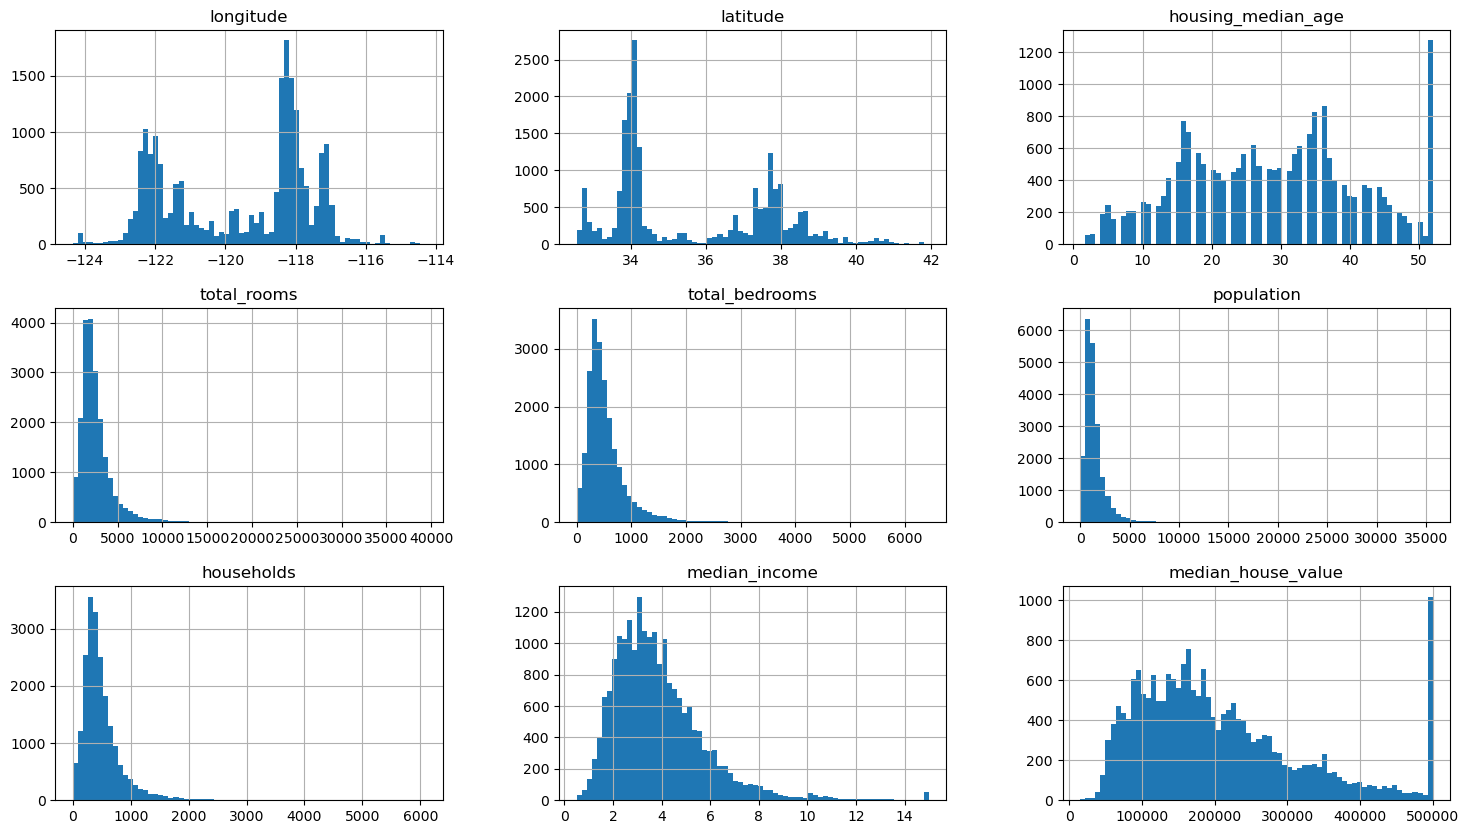

In [35]:
# Distribution of numerical values
housing.hist(bins=70, figsize=(18, 10))
plt.show()

In [40]:
housing['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [42]:
print(housing['median_house_value'].mode())
print(housing['median_house_value'].mean())
print(housing['median_house_value'].median())

0    500001.0
Name: median_house_value, dtype: float64
206855.81690891474
179700.0


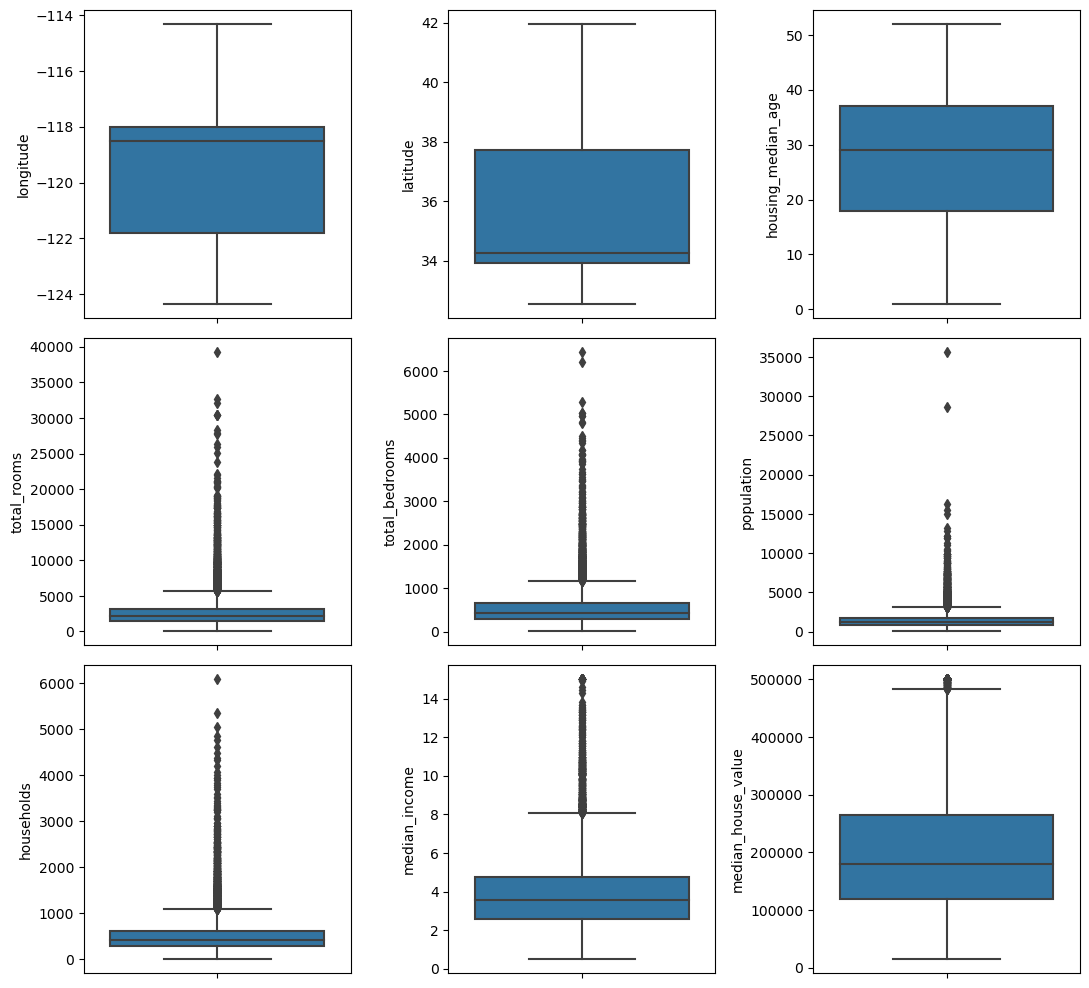

In [43]:
num_features = list(housing.drop('ocean_proximity', axis=1))

fig, ax = plt.subplots(3, 3, figsize=(11, 10))
ax = ax.flatten()

for i, column in enumerate(num_features):
    sns.boxplot(ax=ax[i], data=train_set, y=column)
    #ax[i].set_title(column)
    
plt.tight_layout()
plt.show()

### Split into train and test set

In [10]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
print(type(train_set))

<class 'pandas.core.frame.DataFrame'>


### EDA

Correlation with numerical values.
histogram of categorical

In [12]:
corr = train_set.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


<Axes: >

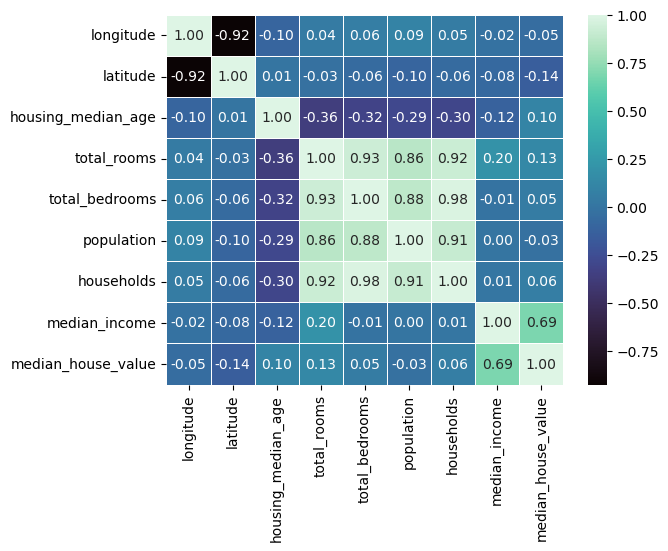

In [13]:
sns_Corr = train_set.corr()
sns.heatmap(sns_Corr, annot=True, linewidth=.5, cmap = "mako", fmt=".2f")

In [14]:
print(type(sns_Corr))

<class 'pandas.core.frame.DataFrame'>


#### Impute nan, encode categorical.

### Preprocessing pipeline

In [16]:
# Split into x and y data
X_train = train_set.drop('median_house_value', axis=1)
# do I need copy
y_train = train_set['median_house_value'].copy()

X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

In [17]:
# Argument for why i choose median as strategy, total bedrooms looks skewed.
# why use standard scaler. Do i even need to standardize the data?
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [18]:
# Eftersom jag ger den en lista hade jag kanske kunna dela upp i x och y efter pipeline, 
# eftersom den ändå inte kommer att transformera y.
num_features = list(X_train.drop('ocean_proximity', axis=1))
cat_features = ["ocean_proximity"]

# Dummy encoding
#OneHotEncoder(drop='first', sparse=False)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

In [19]:
X_train_transformed = full_pipeline.fit_transform(X_train)

## Models
Random Forest Regressor, Lasso, Elastic net, Ridge regression, SVR, Ensemble regressors

In [55]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Linear regression

In [20]:
lin_reg = LinearRegression()
# cross validate (difference cross_validate and cross_val_score)

In [47]:
#cross_validate
# MSE is prefered for a bell shaped distribution, and MAE when there are many outliers. Plot distribution of y.
#crossval will fit the data and test it on the k fold.
cv_lin_reg = cross_validate(lin_reg, X_train_transformed, y_train, scoring='neg_mean_squared_error')
cv_lin_reg
cv_lin_reg['test_score']
print('RMSE for each iteration:', np.sqrt(-cv_lin_reg['test_score']))
print('RMSE:', np.sqrt(np.mean(-cv_lin_reg['test_score'])))

RMSE for each iteration: [68720.86414272 67486.73292125 67641.76081141 67893.04481481
 71370.84352754]
RMSE: 68637.72568294163


In [56]:
# cross_val_score
lin_reg_scores = cross_val_score(lin_reg, X_train_transformed, y_train, scoring='neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_rmse_scores)

Scores: [68720.86414272 67486.73292125 67641.76081141 67893.04481481
 71370.84352754]
Mean: 68622.64924354748
Standard deviation: 1438.5401363182582


#### Lasso

In [22]:
#lasso_reg = 

#### Elastic net

#### Ridge regression

#### SVR

#### Decison tree regressor

In [51]:
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, X_train_transformed, y_train, scoring='neg_mean_squared_error')
scores

array([-4.93588936e+09, -4.87594360e+09, -4.80840149e+09, -4.63469516e+09,
       -5.02177832e+09])

In [53]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([70255.8848972 , 69827.95718595, 69342.63831708, 68078.59547835,
       70864.50676209])

In [54]:


display_scores(tree_rmse_scores)

Scores: [70255.8848972  69827.95718595 69342.63831708 68078.59547835
 70864.50676209]
Mean: 69673.91652813491
Standard deviation: 941.7765464328384


#### Random forest regressor

In [58]:
forest_reg = RandomForestRegressor()
#forest_reg.fit(X_train_transformed, y_train)

RandomForestRegressor()

#### Ensemble regressors

#### Evaluate the models

#### Save the models with joblib

In [ ]:
joblib.dump(my_model, 'my_model.pkl')
my_model_loaded = joblib.load()

#### Select the best model and test it

In [23]:
# Transform test data with pipeline, using transform but not fit.